In [1]:
library(tidyverse)

Warning message:
“replacing previous import by ‘tidyr::%>%’ when loading ‘broom’”Warning message:
“replacing previous import by ‘tidyr::gather’ when loading ‘broom’”Warning message:
“replacing previous import by ‘tidyr::spread’ when loading ‘broom’”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data_path <- '../data/'
df <- read_csv(paste0(data_path, 'predicted_Q_df_test_sam.csv'))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_integer(),
  subject_id = col_integer(),
  hadm_id = col_integer(),
  icustay_id = col_integer(),
  interval_start_time = col_datetime(format = ""),
  interval_end_time = col_datetime(format = ""),
  discrete_action = col_integer(),
  hospital_expire_flag = col_integer(),
  reward = col_integer(),
  best_action = col_integer()
)
See spec(...) for full column specifications.


In [3]:
head(df)

X1,subject_id,hadm_id,icustay_id,interval_start_time,interval_end_time,ALBUMIN,ANION GAP,BANDS,BICARBONATE,⋯,elixhauser_hospital,blood_culture_positive,discrete_action,hospital_expire_flag,reward,row_id,row_id_next,predicted_Q_physician,predicted_Q_optimal,best_action
0,145,198161,226841,2144-03-29 19:00:00,2144-03-29 23:00:00,-0.05746277,0.02267872,-0.2986458,-0.5996432,⋯,1.463854,-0.6855025,4,0,0,0,1,13.69285,15.37461,6
1,145,198161,226841,2144-03-29 23:00:00,2144-03-30 03:00:00,0.08514148,-0.72206787,-0.2986458,-0.3857340,⋯,1.463854,-0.6855025,3,0,0,1,2,13.84949,15.51538,6
2,145,198161,226841,2144-03-30 03:00:00,2144-03-30 07:00:00,0.08514148,-0.72206787,-0.2986458,-0.3857340,⋯,1.463854,-0.6855025,3,0,0,2,3,14.36780,16.03835,6
3,145,198161,226841,2144-03-30 07:00:00,2144-03-30 11:00:00,0.08514148,-0.72206787,-0.2986458,-0.3857340,⋯,1.463854,-0.6855025,2,0,0,3,4,14.46644,16.37404,6
4,145,198161,226841,2144-03-30 11:00:00,2144-03-30 15:00:00,0.08514148,-0.72206787,-0.2986458,-0.3857340,⋯,1.463854,-0.6855025,0,0,0,4,5,13.26639,15.58014,6
5,145,198161,226841,2144-03-30 15:00:00,2144-03-30 19:00:00,0.08514148,-0.72206787,-0.2986458,-1.6691893,⋯,1.463854,-0.6855025,0,0,0,5,6,12.18728,19.72853,12


In [4]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [5]:
temp <- df %>%
        group_by(subject_id) %>%
        mutate(relative_time = difftime(interval_start_time, min(interval_start_time) + hours(24), units = 'hours')) %>%
        ungroup() 

# temp %>%
#         ggplot(aes(relative_time, predicted_Q, color = as.factor(hospital_expire_flag))) +
#         geom_smooth() + 
#         xlab('Relative Hours') +
#         ylab('Predicted Q for Physician Policy') + 
#         scale_color_discrete('Died in Hospital', labels = c('No', 'Yes')) + 
#         theme(legend.position = c(0.2, 0.1))

`geom_smooth()` using method = 'gam'


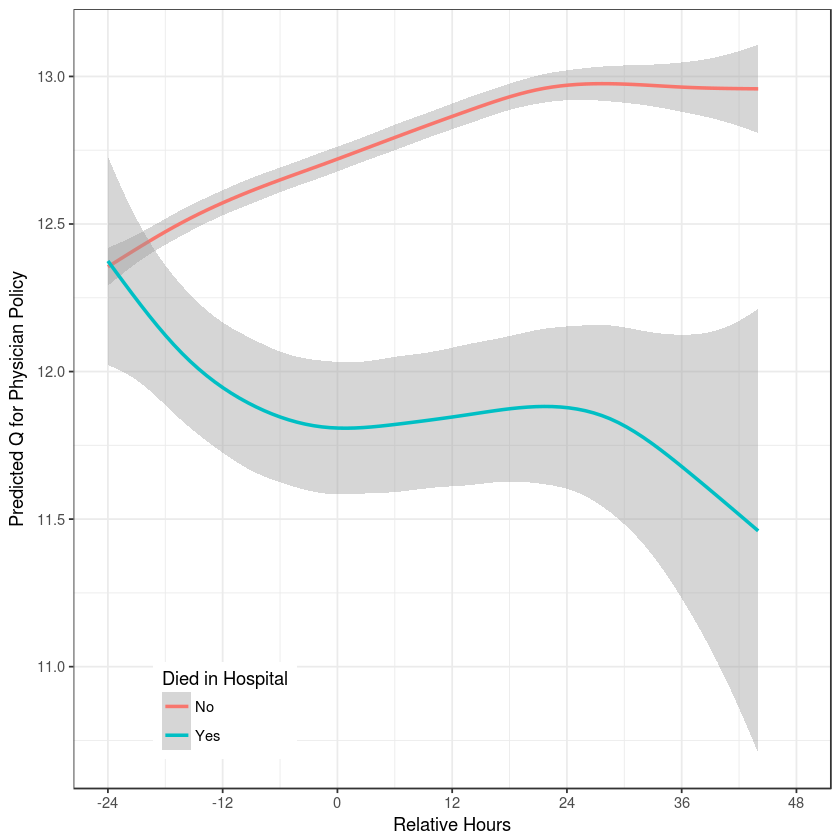

In [6]:
temp %>%
        ggplot(aes(relative_time, predicted_Q_physician, color = as.factor(hospital_expire_flag))) +
        geom_smooth() + 
        xlab('Relative Hours') +
        ylab('Predicted Q for Physician Policy') + 
        scale_color_discrete('Died in Hospital', labels = c('No', 'Yes')) + 
        theme_bw() + 
        theme(legend.position = c(0.2, 0.1),
              legend.key = element_blank()) +
        scale_x_continuous(breaks = c(-24, -12, 0, 12, 24, 36, 48), limits = c(-24, 48)) 

`geom_smooth()` using method = 'gam'


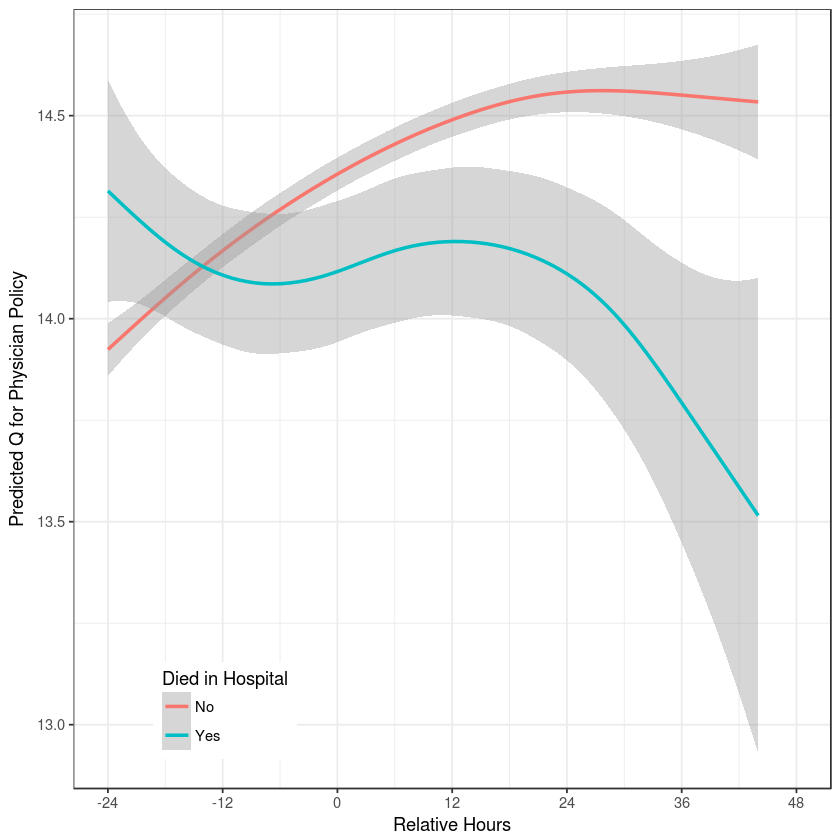

In [7]:
temp %>%
        ggplot(aes(relative_time, predicted_Q_optimal, color = as.factor(hospital_expire_flag))) +
        geom_smooth() + 
        xlab('Relative Hours') +
        ylab('Predicted Q for Optimal Policy') + 
        scale_color_discrete('Died in Hospital', labels = c('No', 'Yes')) + 
        theme_bw() + 
        theme(legend.position = c(0.2, 0.1),
              legend.key = element_blank()) +
        scale_x_continuous(breaks = c(-24, -12, 0, 12, 24, 36, 48), limits = c(-24, 48)) 

`geom_smooth()` using method = 'gam'


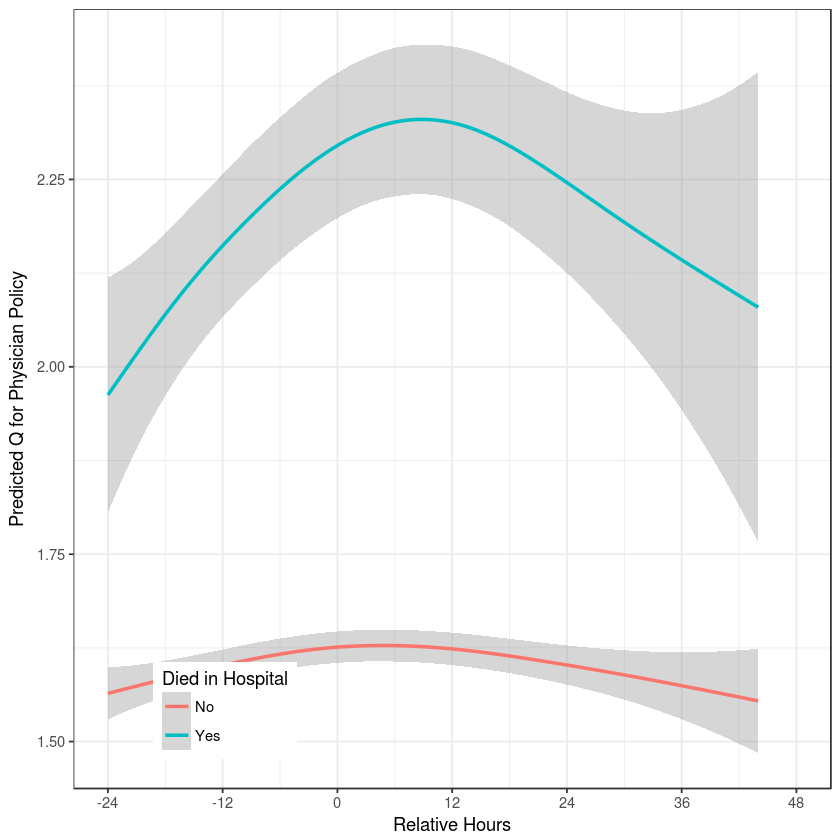

In [8]:
temp %>%
        ggplot(aes(relative_time, predicted_Q_optimal - predicted_Q_physician, 
                   color = as.factor(hospital_expire_flag))) +
        geom_smooth() + 
        xlab('Relative Hours') +
        ylab('Difference in Predicted Q between Optimal and Physician Policy') + 
        scale_color_discrete('Died in Hospital', labels = c('No', 'Yes')) + 
        theme_bw() + 
        theme(legend.position = c(0.2, 0.1),
              legend.key = element_blank()) +
        scale_x_continuous(breaks = c(-24, -12, 0, 12, 24, 36, 48), limits = c(-24, 48)) 

In [9]:
# ggsave('../figures/policy_difference_mortality.png', width = 6, height = 6, units = 'in')

In [9]:
temp2 <- temp %>% gather(Q_type, value = Q, predicted_Q_physician, predicted_Q_optimal)

`geom_smooth()` using method = 'gam'


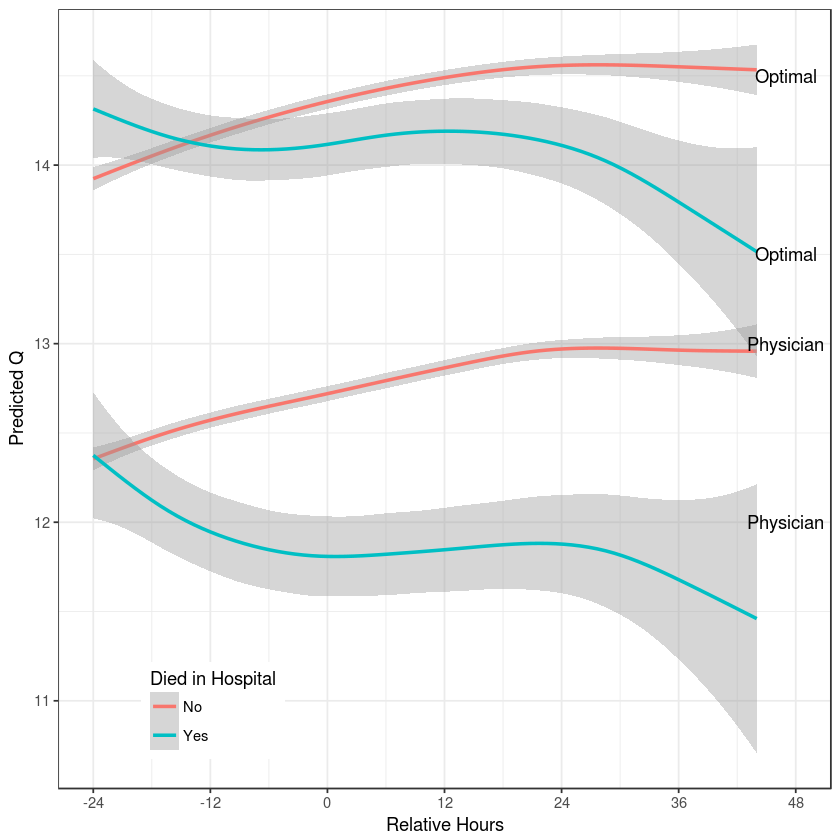

In [10]:
temp2 %>%
        ggplot(aes(relative_time, Q, 
                   color = as.factor(hospital_expire_flag),
                   shape = Q_type)) +
        geom_smooth() + 
        xlab('Relative Hours') +
        ylab('Predicted Q') + 
        scale_color_discrete('Died in Hospital', labels = c('No', 'Yes')) + 
        theme_bw() + 
        theme(legend.position = c(0.2, 0.1),
              legend.key = element_blank()) +
        scale_x_continuous(breaks = c(-24, -12, 0, 12, 24, 36, 48), limits = c(-24, 48)) +
        annotate('text', label = 'Optimal', x = 47, y = 14.5) + 
        annotate('text', label = 'Optimal', x = 47, y = 13.5) + 
        annotate('text', label = 'Physician', x = 47, y = 13) + 
        annotate('text', label = 'Physician', x = 47, y = 12) #+ 
#         ylim(10, 15)

In [11]:
ggsave('../figures/policy_comparison_mortality_sam.png', width = 6, height = 6, units = 'in')

`geom_smooth()` using method = 'gam'
